# Solucion de ecuaciones diferenciales parciales mediante el metodo de diferencias finitas

## Itroduccion:
El 99.99999....  de los PDEs en la practica no tienen solucuion **analitica**. Por que entonces estudiamos la teoria de PDE. Por varias razones.

* Por que es "divertido". Pule la mente. Agiliza el pensamiento.
* Necesitamos soluciones analiticas para poder verificar los metodos numericos.
* Le dan trabajo a los profesores y a los investigadores.


Los metodos numericos son el "caballito de batalla" para muchos problemas en fisico/matematica y particularmente en las PDE.

La PDEs estan presentes en casi todos los campos de la ciencia.
Fisica, Quimica, la matematicas, en ciencia de la computacion, en la bioligia, la econimia, ....etc.

Hay varios metodos numericos para resolver las PDEs. Algunos son

* Diferencias Finitas (este curso)
* Elementos finitos.
* Metodos de lineas. (bucar en Google)
* Volumenes Finitos.  (bucar en Google)


Antes de introducir el metodo de **diferencias finitas** vamos a ver un poco de teoria acerca de las PDEs que nos atanhen.

### Taxonomias de PDEs. (Partial Differential Equations)
Necesito que esten familiarizados con el concepto de **derivadas parciales**.

Por ejemplo $u=u(x,y)$, entonces definimos (notacion)


$$ \frac{\partial^2 u}{\partial x \partial y} = u_{xy} = u_{,12}.$$
Esta esta expresion se llama **derivada parcial mixta de segundo orden**. Generalizamos,

Asumimos una function
$$ u(x_1, x_2, \cdots, x_n)$$
notamos (notacion)


$$\frac{\partial^{i_1+ i_2 + \cdots i_n} u }{\partial x_1^{i_1} \partial x_2^{i_2} \cdots \partial x_n^{i_n}} =
u_{x_1^{i_1}}  u_{x_2^{i_2}}
 \cdots  u_{x_n^{i_n}}  =
 u_{, 1^{i_1} 2^{i_2} \cdots n^{i_n}}
$$
$i_j=0, 1, \cdots $, $j=1,2 , \cdots , n$

Ejemplo: Asuamos tres variables $x_1,x_2, x_3$ (o $x,y,z$).
asumamos $i_1=1$, $i_2=2$, $i_3=0$ entonces

$$\frac{\partial^{i_1+ i_2 + \cdots i_n} u }{\partial x_1^{i_1} \partial x_2^{i_2} \cdots \partial x_n^{i_n}} =
\frac{\partial^3 u }{\partial x_1 \partial x_2^2} = u_{x_1 x_2^2} = u_{xyy} = u_{,1 2^2} = u_{,122}.
$$

Entendiendo esta definicion, definimos la ecuacion diferencial PDE. Buscamos la solucion $u=u(x_1, x_2, \cdots, x_n)$
La expresion:

$$f \left (x_1,x_2, \cdots, x_n, u, \frac{\partial^{i_1+ i_2 + \cdots i_n} u }{\partial x_1^{i_1} \partial x_2^{i_2} \cdots \partial x_n^{i_n}} \right ) = 0  .$$

es una ecuacion diferencial en derivadas parciales PDE.
Las variables (argumentos) de $f$ son las coordenas $x_1, x_2, \cdots, x_n$, $u$ y las derivadas parciales de $u$.
Por lo menos alguna derivada parcial no es 0 por que entonces seria ecuacion algebraica.

Si $f$ es lineal en $u$ y sus derivadas parciales entonces $f$ se dice **lineal**. Asumimos que las derivadas mixtas son iguales, es decir, por ejemplo $u_{xy} = u_{yx}$. (esto es verdad siempre y cuando sean continuas). Lo mismo para cualquier orden. $u_{xyz}=u_{yzx}=....$. La suma de indices
$i_1 + i_2 + \cdots + i_n > 0$. Si la suma de indices es 0 no hay derivadas parciales y la ecuacion es algebraica.

En este curso solo nos enfocaremos a las PDE de segundo orden lineales. Por que no las de primer orden? Mi respuesta es por que en Metodos Numericos (I), se ensenha el metodo de **Runge Kutta** para resolver estas ecuaciones.

Escribamos las ecuaciones de segundo orden de la siguiente forma.


$$\sum_{i,j=1}^n A_{ij} u_{,ij} + \sum_{i=1}^n B_i u_{,i} + g(x_1, x_2, \cdots, x_n) = 0.$$
La funcion $g$ se denomina **fuente** (source).

**Ejemplo 1:**: En aplicaciones es comun encontrar las variables $x,y,t$ donde $t$ es tiempo y las otras espacio.
Si $u=u(x,y,t)$ consideramos el siguiente sistema

$$A u_{xx} + B u_{xy} + C u_{yy} + D u_{xt} + E u_{yt} + F u_{tt} + G u_x + H u_y + I u_t + g(x,y,t) = 0 .$$










Aca $A=A(x,y,t)$, y asi con las demas.


Estas ecuaciones las vamos a **clasificar** por razones pragmaticas.  Para usamos esta notacion.


$$ X = \frac{\partial}{\partial x} \quad , \quad
 Y = \frac{\partial}{\partial y} \quad , \quad
 Z = \frac{\partial}{\partial z}
 .$$

 Las ecuaciones PDE lineales de segundo orden se clasifican asi:


 1. Elipticas:
 Para el caso de la ecuacion **canonica** de la elipse

 $$ f(X,Y) = \frac{X^2}{a^2} + \frac{Y^2}{b^2} - 1 = 0 \tag{1} .$$
 Algebraicamente esto es una elipse, pero en el contexto de PDE esto es una ecuacion **eliptica**.

 Ojo!!:

 $$X^2 = \left ( \frac{\partial }{\partial x} \right)^2 =  \frac{\partial^ 2}{\partial x \partial x} .$$

 Este sistema lo podemos escribir como
 $$ A(x,y) X^2 + B(x,y) Y^2 = g(x,y) .$$
 Aca no hay terminos cruzados $XY$.

 $$XY = \frac{\partial }{\partial x} \frac{\partial}{\partial y} = \frac{\partial^2}{\partial x \partial y} .$$
donde $A >0$ $B>0$. Un ejemplo importante  $A=B=1$, $g(x,y)=\rho(x,y)$, ecuacion (1) queda:


$$\nabla^2 u = \frac{\partial^2u}{\partial x^2} + \frac{\partial^2 u}{\partial y}  = \rho(x,y).$$

Cuando $\rho(x,y) \ne 0$ esta se llama la **ecuacion de Poisson**, si $\rho(x,y)=0$ se llama la ecuacion de **Laplace**.

2. Las **parabolicas**. La forma canonica:

$$ T - \alpha X^2 - g(x,t) = 0 .$$
En particular

$$\frac{\partial u}{\partial t} - \alpha \frac{\partial^2 u}{\partial x^2}.$$
Esta es la
[ecuacion de calor](https://en.wikipedia.org/wiki/Heat_equation).

3. Las **hiperbolicas**: La forma canonica:


$$ f(X, T) = \frac{X^2}{a^2} - \frac{T^2}{b^2} - 1 = 0 .$$
Se puede escribir mas general

$$A(x,t) \frac{\partial^2 u}{\partial x^2} - B(x,t) \frac{\partial u^2}{\partial y^2} = g(x,t) .$$
donde $A(x,t) > 0 $ y $B(x,t)> 0$.

La ecuacion tipica es la de onda.

$$ \frac{\partial^2 u}{\partial x^2} - \frac{1}{c^2(x)} \frac{\partial^2 u}{\partial t^2} = g(x,t) .$$


En general para funciones de dos variables $u=u(x,y)$

$$A u_{xx} + B u_{xy} + C_{yy} + D u_x + E u_y + F u + G = 0 .$$
donde $A=A(x,y)$ y asi con las otras.


Aca hay una similiaridad con la ecuacion algebraica.

$$ A x^2 + B xy + C y^2 + Dx + Ef + F = 0 $$
Esta ecuacion es de una **conica**: La grafica en plano $xy$ es
una elipse, una parabola o una hiperbola. Si $A=C$ es un circulo.







De quien depende que esta ecuacion sea una elipse o parabola o hiperbola? del discriminante.

$$\Delta = B^2 - 4 AC $$.
Este es el que determina el tipo de ecuacion.

* Si $\Delta < 0$, la ecuacion es eliptica.
* Si $\Delta = 0$ la ecuacion es parabolica.
* Si $\Delta > 0$ la ecuacion es hiperbolica.




# Metodo de diferencias finitas.
La idea consiste en discretizar el espacio (dominio) donde se evaluara la solucion.

Tenemos los siguientes elementos

1. El dominio es rectangular (esto es una desventaja del metodo de diferencias finitas, los elementos finitos permiten fronteras mas generales).  Matematicamente $(x,y)$ son tales que
$$ a \le x \le b \quad , \quad c \le y \le d .$$
(aca todos son numeros reales, $a,b,c,d,x \in \mathbb{R}$

1. La frontera
La caja (dominio) se define mas concretamente, la **frontera**
esta dada por.

$$B= \{ (x,y) | (x = a  \vee x=b) \wedge ( y =c \vee y = d) \}.$$
Que esta es la fronteria.

3. Se segmentan los puntos $(x_i, y_i)$ (malla) tales que
$x_0=a, y_0=c, x_i=x_0 + i h$, $y_i = y_0 + jk$ donde
$h=(b-a)/n$, $k=(d-c)/m$, $i=0, 1, \cdots , n$, $j=0,1, \cdots, m$.

Ojo: Observen que hay $n+1$ puntos y $n$ invervalos.


Tambien pueden haber intervalos abiertos en el sentido de que crece pero no hay una frontera superior. Por ejemplo el tiempo $t \ge 0$. En la practica $t < T$.

4. Notacion, $u(x_i, y_j) = u_{ij}$



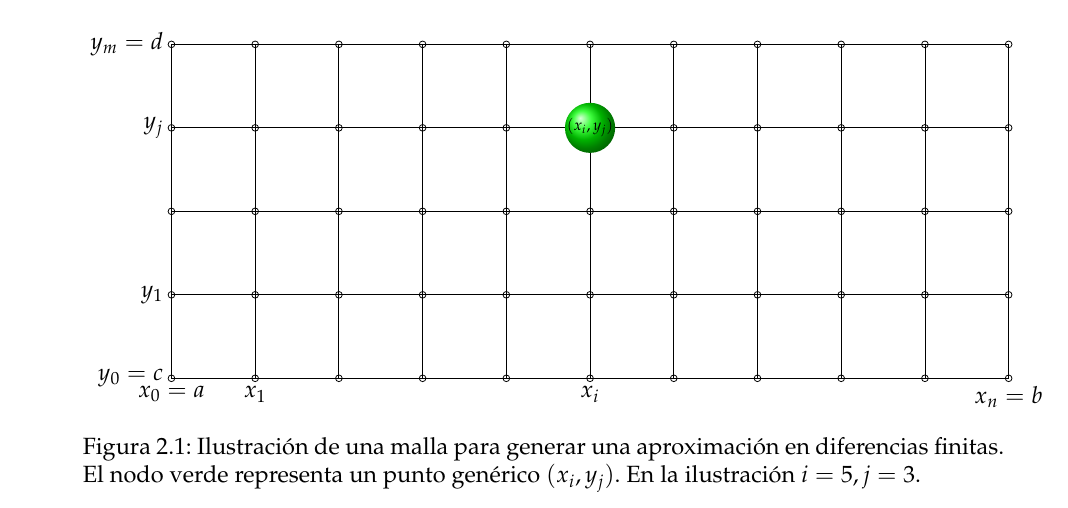

### Notacion para derivadas de primero y segundo orden

$$u_x  = \frac{u(x+h, y) - u(x,y)}{h} - u_{xx}(c,y) \frac{h}{2} .$$

donde $c$ es un punto entre $x$ y $x+h$.
Cuando discretizamos ( la malla)
$$u_x(x_i, y_j)  = \frac{u(x_i+h, y_j) - u(x_i,y_i)}{h} - u_{xx}(c_i,y_j) \frac{h}{2} .$$
donde $c_i$ esta entre $x_i $ y $x_i+h$.

Ojo!!!! notacion.

$$ u_x(x_i, y_j) \approx \frac{w_{i+1 j}-w_{ij}}{h}.$$
Es la diferencia "forward" (hacia adelante)
Observe que usamos $u_{ij}$ para el continuo (el exacto)
y $w_{ij}$ para el discreto (la aproximacion).

Ojo: Yo escribo $w_{i+1 j}$ para decir $w_{(i+1)} j$
pero me da pereza usar los parentisis :(.
He visto en la literatura $w_{i+1, j}$ .



$$ u_x(x_i, y_j) \approx \frac{w_{i j}-w_{i-1j}}{h}.$$
esta es "backward", hacia atras.

$$ u_x(x_i, y_j) \approx \frac{w_{i+1 j}-w_{i-1j}}{h}.$$
central.

Si la derivada es en $y$,   $\partial/\partial y$

$$ u_y(x_i, y_j) \approx \frac{w_{i j+1}-w_{ij-1}}{h}.$$
central.

Segunda derivada.

$$ u_{xx}(x_i, y_j) \approx \frac{w_{i+1 j}-2 w_{ij} + w_{i-1 j}  }{h}.$$
central.

$$ u_{yy}(x_i, y_j) \approx \frac{w_{i j+1}-2 w_{ij} + w_{i j-1}  }{h}.$$


# Proxima clase, comenzamos con las ecuaciones parabolicas (calor).